# Job Watch Analytics

##### INIT (Run Once)

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

##### Set Variables

In [147]:
result_dir = 'results/'
data_headers = ['Date', 'Time', 'Keyword', 'Location', 'Count']

keywords = ['angular', 'javascript', 'node', 'python', 'react', 'sql']
location = 'austin'

##### Load All Result Data

In [167]:
# Read all CSV Files
def read_all_results():
    datasets = []
    filenames = os.listdir(result_dir)

    for file in filenames:
        datasets.append(pd.read_csv(f'{result_dir}{file}', header=None))

    return datasets

# Create DataFrame
df = pd.concat(read_all_results(), ignore_index=True)
df.columns = data_headers

df.head()

,Date,Time,Keyword,Location,Count
0,2021-12-07,09:30:38.258867,python,austin,113
1,2021-12-08,12:04:50.071836,python,austin,156
2,2021-12-09,16:58:44.075794,python,austin,192
3,2021-12-07,09:31:09.838237,javascript,austin,81
4,2021-12-08,12:04:32.472455,javascript,austin,117


##### Sorted Data

In [175]:
def sort_data(sort_by, ascending = True):
    return df.sort_values(by=sort_by, ascending=ascending, ignore_index=True)


sort_data('Count').head()

,Date,Time,Keyword,Location,Count
0,2021-12-07,09:31:30.935813,node,austin,14
1,2021-12-07,09:31:40.743917,angular,austin,17
2,2021-12-08,12:04:42.711744,node,austin,24
3,2021-12-09,16:58:37.896990,node,austin,27
4,2021-12-08,12:04:19.397448,angular,austin,36


##### Plot All Data At Location

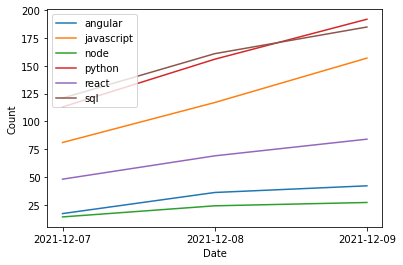

In [180]:
def plot_all_data(x_axis, y_axis):
    # Initialize plot
    fig, ax = plt.subplots()
    ax.set_xlabel(x_axis)
    ax.set_ylabel(y_axis)

    # Plot data
    for keyword in keywords:
        data = df[df['Keyword'] == keyword]
        ax.plot(data[x_axis], data[y_axis], label=keyword)
        
    ax.legend(loc="upper left")
    

plot_all_data('Date', 'Count')